# Getting started

Using a provided dataset, create a Linear Regression model and an executive summary write up based on your chosen scenario.

# 1) Your work must: Identify the problem

### Write a high quality problem statement

Problem Statement: A liquor store owner in Iowa is looking to expand to new locations and has hired you to investigate the market data for potential new locations. The business owner is interested in the details of the best model you can fit to the data so that his team can evaluate potential locations for a new storefront.

Describe the goals of your study and criteria for success

Goal: Build models of total sales based on location, price per bottle, total bottles sold. You may find it useful to build models for each county, zip code, or city.
Provide a table of the best performing stores by location type of your choice (city, county, or zip code) and the predictions of your model(s).

Based on your models and the table of data, recommend some general locations to the business owner, taking into account model performance. Validate your model's performance and ability to predict future sales using cross-validation.

Bonus: Recommend targets for volume sold and price per bottle!

# 2) Acquire the data

Obtain the data here -- it's from Iowa.gov, filtered and reduced a bit
There is a further reduced version that is 10% of the version above here

In [1]:
## Importing the packages that are needed for this project

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

# 3) Explore the data

### Import data using the Pandas Library

In [2]:
# Load the data into a DataFrame

file_name = ('/Users/ryangin/Desktop/General_Assembly/Cleaned Folders/Cleaned Projects Folder/01-projects-weekly/project-03/Assets/Iowa_Liquor_sales_sample_10pct.csv')

In [3]:
df = pd.read_csv(file_name)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


### Perform exploratory analysis methods with visualization and statistical analysis

References: 
week-03/1.4-lab/code/solution-code

In [4]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [5]:
# Convert Date column to datetime type
#df['Date'] = pd.to_datetime(df['Date'], format ="%Y/%m/%d")
df['Date'] = pd.to_datetime(df['Date'], format ="%m/%d/%Y")

In [6]:
# Replaces all the $ in the dataset with a space
df_reg = df.replace({'\$': ''}, regex=True)

In [7]:
# Convert columns to float types
df_reg[['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']] = df_reg[['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']].astype(float) 

In [8]:
df_reg.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)              float64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [9]:
df_reg.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


In [10]:
df_reg.shape

(270955, 18)

In [11]:
df_drop = df_reg.dropna()

In [12]:
df_drop.count()

Date                     269258
Store Number             269258
City                     269258
Zip Code                 269258
County Number            269258
County                   269258
Category                 269258
Category Name            269258
Vendor Number            269258
Item Number              269258
Item Description         269258
Bottle Volume (ml)       269258
State Bottle Cost        269258
State Bottle Retail      269258
Bottles Sold             269258
Sale (Dollars)           269258
Volume Sold (Liters)     269258
Volume Sold (Gallons)    269258
dtype: int64

In [13]:
iowa_sample = df_drop.sample(frac=0.1)

In [14]:
iowa_sample

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
107990,2015-12-26,2591,ATLANTIC,50022,15.0,Cass,1051110.0,BLACKBERRY BRANDIES,434,55086,Paramount Blackberry Brandy,750.0,5.48,8.22,4,32.88,3.00,0.79
156960,2015-01-07,2603,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,380,37347,Phillips Vodka,1000.0,4.29,6.44,12,77.28,12.00,3.17
67179,2015-02-16,3886,ANAMOSA,52205,53.0,Jones,1062310.0,SPICED RUM,259,43028,Admiral Nelson Spiced Rum,1750.0,11.55,17.33,6,103.98,10.50,2.77
76568,2015-03-25,4453,FOREST CITY,50436,95.0,Winnebago,1051110.0,BLACKBERRY BRANDIES,434,55087,Paramount Blackberry Brandy,1000.0,6.53,9.80,12,117.60,12.00,3.17
40828,2015-05-13,4129,AMES,50010,85.0,Story,1012200.0,SCOTCH WHISKIES,35,4866,Dewars White Label Scotch,750.0,13.73,20.60,2,41.20,1.50,0.40
113813,2015-09-14,4949,DAVENPORT,52802,82.0,Scott,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375.0,1.80,2.70,24,64.80,9.00,2.38
121101,2015-11-24,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750.0,10.50,15.75,60,945.00,45.00,11.89
245151,2015-02-05,4734,URBANDALE,50322,77.0,Polk,1062310.0,SPICED RUM,240,45886,Sailor Jerry Spiced Navy Rum,750.0,9.65,14.48,12,173.76,9.00,2.38
55104,2015-03-30,2191,KEOKUK,52632,56.0,Lee,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35,43127,Bacardi Superior Rum,1000.0,9.50,14.25,24,342.00,24.00,6.34
211289,2015-04-02,4902,WATERLOO,50703,7.0,Black Hawk,1011100.0,BLENDED WHISKIES,297,23824,Five Star,375.0,2.00,3.00,24,72.00,9.00,2.38


In [15]:
iowa_sample.shape

(26926, 18)

In [16]:
iowa_sample.to_csv('Iowa_Liquor_sales_small.csv', index=False)

In [17]:
new_sample = pd.read_csv('Iowa_Liquor_sales_small.csv')

In [18]:
new_sample.shape

(26926, 18)

In [19]:
new_sample

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-12-26,2591,ATLANTIC,50022,15.0,Cass,1051110.0,BLACKBERRY BRANDIES,434,55086,Paramount Blackberry Brandy,750.0,5.48,8.22,4,32.88,3.00,0.79
1,2015-01-07,2603,BETTENDORF,52722,82.0,Scott,1031080.0,VODKA 80 PROOF,380,37347,Phillips Vodka,1000.0,4.29,6.44,12,77.28,12.00,3.17
2,2015-02-16,3886,ANAMOSA,52205,53.0,Jones,1062310.0,SPICED RUM,259,43028,Admiral Nelson Spiced Rum,1750.0,11.55,17.33,6,103.98,10.50,2.77
3,2015-03-25,4453,FOREST CITY,50436,95.0,Winnebago,1051110.0,BLACKBERRY BRANDIES,434,55087,Paramount Blackberry Brandy,1000.0,6.53,9.80,12,117.60,12.00,3.17
4,2015-05-13,4129,AMES,50010,85.0,Story,1012200.0,SCOTCH WHISKIES,35,4866,Dewars White Label Scotch,750.0,13.73,20.60,2,41.20,1.50,0.40
5,2015-09-14,4949,DAVENPORT,52802,82.0,Scott,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375.0,1.80,2.70,24,64.80,9.00,2.38
6,2015-11-24,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750.0,10.50,15.75,60,945.00,45.00,11.89
7,2015-02-05,4734,URBANDALE,50322,77.0,Polk,1062310.0,SPICED RUM,240,45886,Sailor Jerry Spiced Navy Rum,750.0,9.65,14.48,12,173.76,9.00,2.38
8,2015-03-30,2191,KEOKUK,52632,56.0,Lee,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35,43127,Bacardi Superior Rum,1000.0,9.50,14.25,24,342.00,24.00,6.34
9,2015-04-02,4902,WATERLOO,50703,7.0,Black Hawk,1011100.0,BLENDED WHISKIES,297,23824,Five Star,375.0,2.00,3.00,24,72.00,9.00,2.38


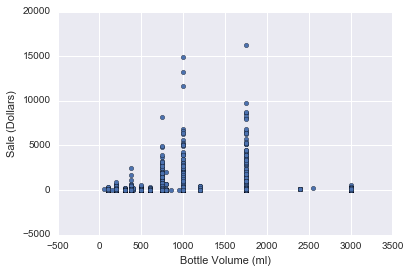

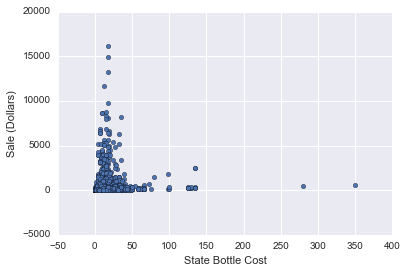

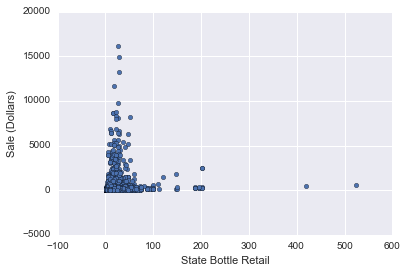

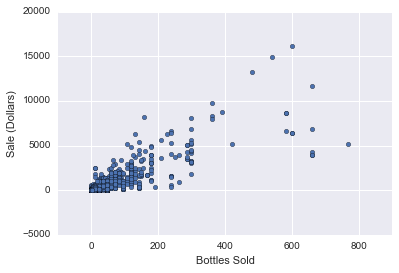

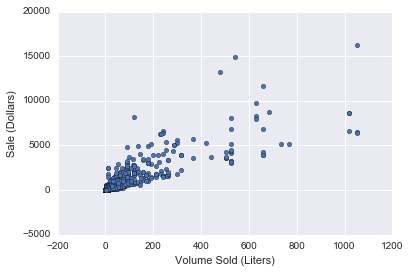

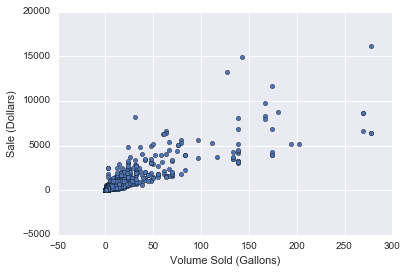

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

# There are many valid solutions.

# For the numerical variables
for column in ["Bottle Volume (ml)", "State Bottle Cost", "State Bottle Retail", "Bottles Sold", "Volume Sold (Liters)", "Volume Sold (Gallons)"]:
    new_sample.plot.scatter(x=column, y="Sale (Dollars)")

In [21]:
total_sales = new_sample['Sale (Dollars)'].groupby([new_sample['County'], new_sample['City'], new_sample['Zip Code'], new_sample['Store Number']]).agg({'Sale (Dollars)':sum})
Top_Sales = total_sales.sort_values(by='Sale (Dollars)', ascending = False)
Top_Sales.head(20)

Sale (Dollars)
County        City            Zip Code Store Number                
Polk          DES MOINES      50314    4829               129016.30
                              50320    2633               123988.38
Johnson       IOWA CITY       52240    2512                54772.15
Linn          CEDAR RAPIDS    52402    3385                48744.72
Polk          WINDSOR HEIGHTS 50311    3420                39183.96
              ANKENY          50021    5144                37933.73
Scott         BETTENDORF      52722    3952                33355.05
Woodbury      SIOUX CITY      51106    3447                32573.04
Linn          CEDAR RAPIDS    52401    3773                31244.85
Johnson       CORALVILLE      52241    2670                27536.74
Scott         DAVENPORT       52804    2625                26387.39
Pottawattamie COUNCIL BLUFFS  51501    4312                26263.28
                              51503    2629                25428.12
Dubuque       DUBUQUE         52001    4167                24930.23
Scott         DAVENPORT       52807    3354                24841.14
Black Hawk    WATERLOO        50702    3494                23654.46
Muscatine     MUSCATINE       52761    2573                23313.11
Polk          ANKENY          50021    2502                22793.39
Story         AMES            50010    3524                22581.24
Linn          CEDAR RAPIDS    52405    2508                20209.21

In [22]:
Top_counties = pd.pivot_table(new_sample, index = ['County'], values = ['Sale (Dollars)'], aggfunc = sum)

In [23]:
Top10_Sales_County = Top_counties
Top10_Sales_by_County = Top10_Sales_County.sort('Sale (Dollars)', ascending = False).head(10)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


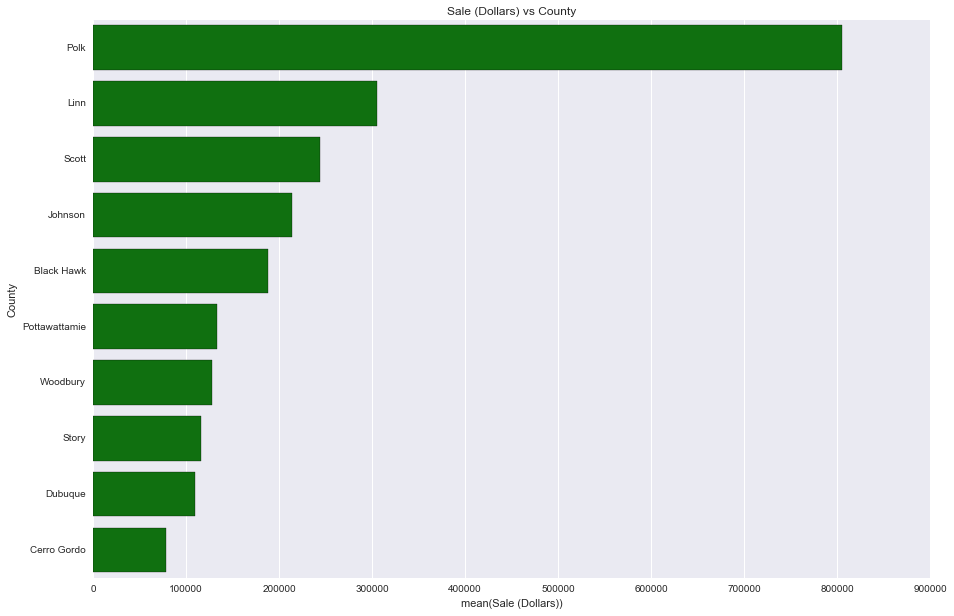

In [24]:
plt.figure(figsize=(15,10))
sns.barplot(y=Top10_Sales_by_County.index, x=Top10_Sales_by_County['Sale (Dollars)'], color='g')\
.set_title('Sale (Dollars) vs County')

In [25]:
Top_cities = pd.pivot_table(new_sample, index = ['City'], values = ['Sale (Dollars)'], aggfunc = sum)

In [26]:
Top20_Sales_City = Top_cities
Top20_Sales_by_City = Top20_Sales_City.sort('Sale (Dollars)', ascending = False).head(20)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


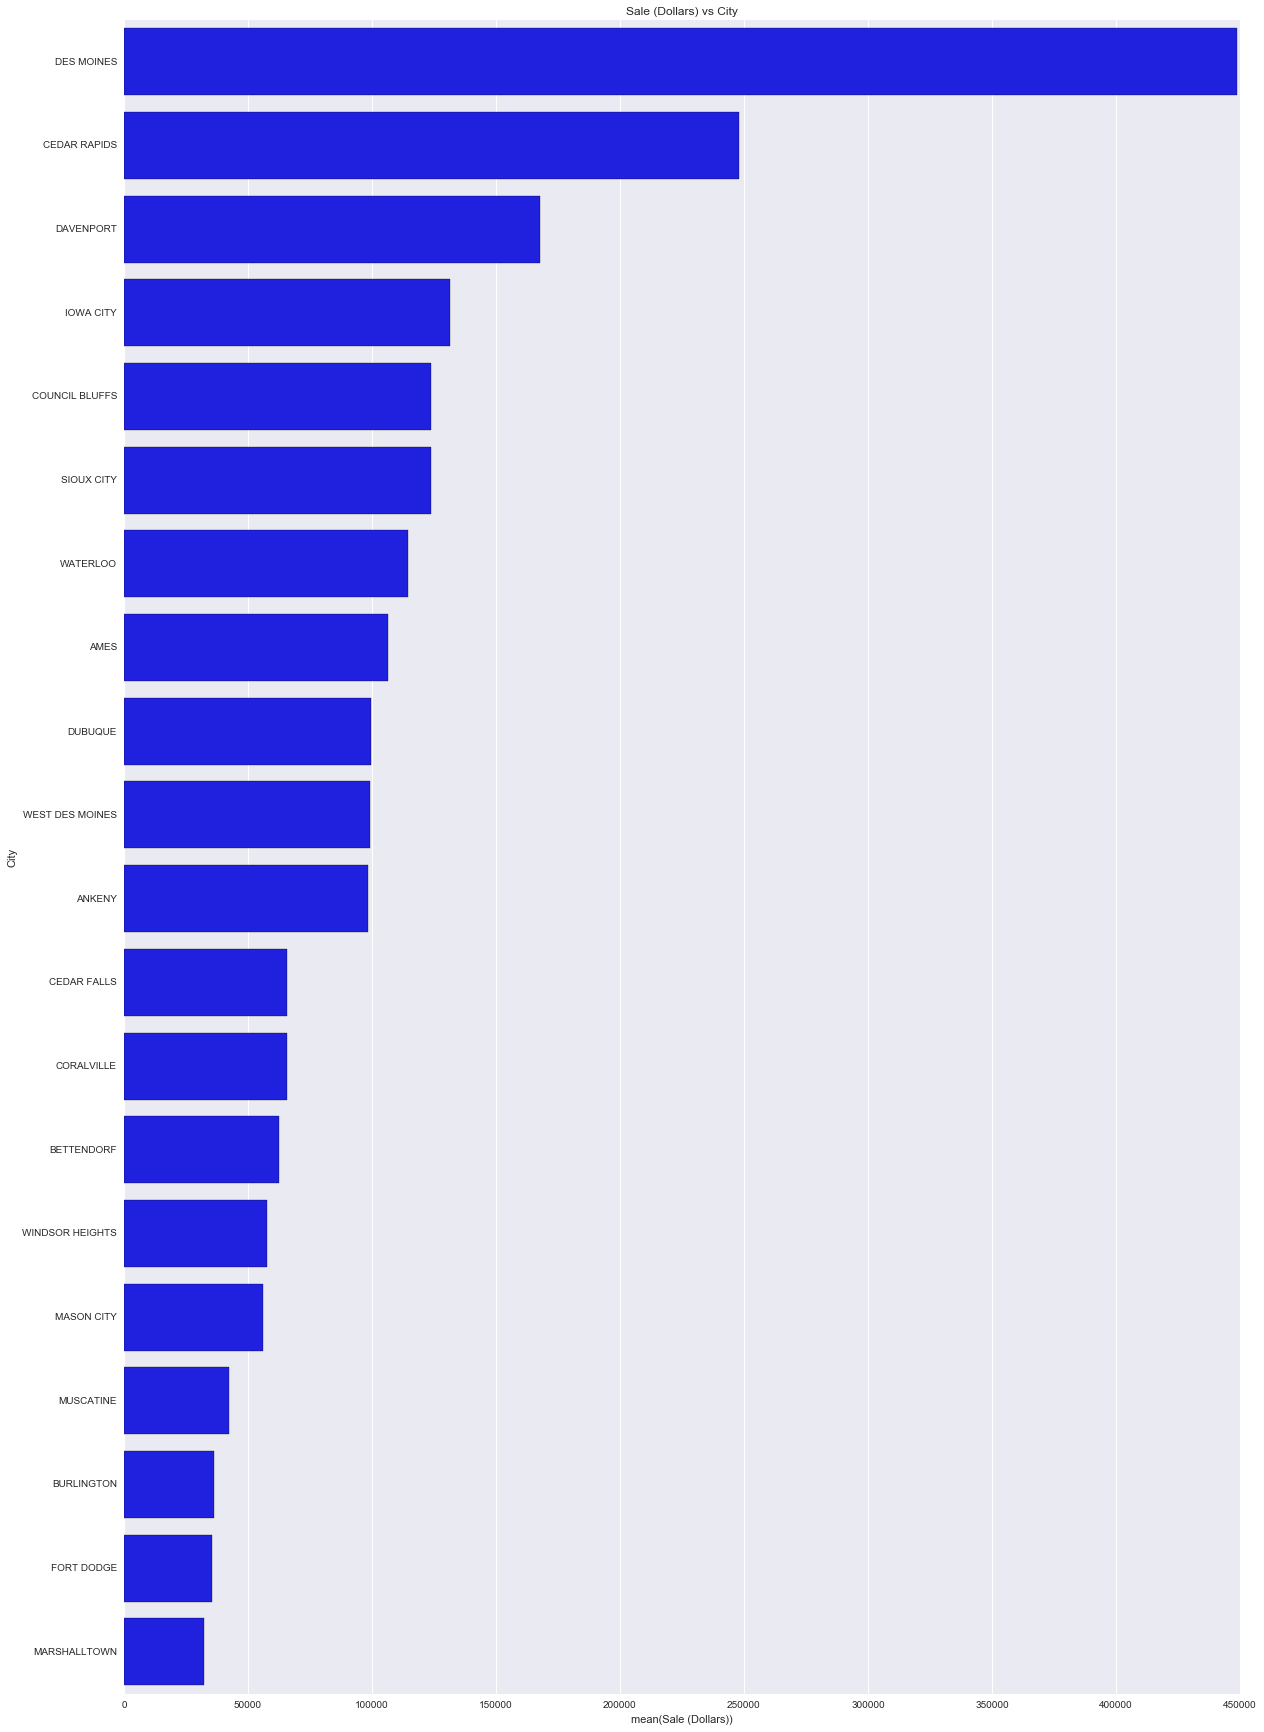

In [27]:
plt.figure(figsize=(20,30))
sns.barplot(y=Top20_Sales_by_City.index, x=Top20_Sales_by_City['Sale (Dollars)'], color='b')\
.set_title('Sale (Dollars) vs City')

### State the risks and assumptions of your data (Outside considerations that could skew or affect the data and make it not reliable)

There are many risks and assumptions that could affect or contribute to making this data unreliable. For example, I removed all the rows with NaN values in them assuming that they were not relevant, but by doing so, I reduced the original dataset. Another thing that I did was that I took a 10% sample of the dataset in order to better work with it. This could skew the data in any direction, meaning that some counties would appear higher although they might not be in the original dataset.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

### Create necessary derived columns from the data (i.e. creating new metrics like bottle per month, finding relationships between columns, daily average user/bottles per person/bottle per store)

In [28]:
# Remove redundant columns
del new_sample["Category Name"]
del new_sample["Item Number"]
del new_sample["County Number"]

In [29]:
new_sample

,Date,Store Number,City,Zip Code,County,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-12-26,2591,ATLANTIC,50022,Cass,1051110.0,434,Paramount Blackberry Brandy,750.0,5.48,8.22,4,32.88,3.00,0.79
1,2015-01-07,2603,BETTENDORF,52722,Scott,1031080.0,380,Phillips Vodka,1000.0,4.29,6.44,12,77.28,12.00,3.17
2,2015-02-16,3886,ANAMOSA,52205,Jones,1062310.0,259,Admiral Nelson Spiced Rum,1750.0,11.55,17.33,6,103.98,10.50,2.77
3,2015-03-25,4453,FOREST CITY,50436,Winnebago,1051110.0,434,Paramount Blackberry Brandy,1000.0,6.53,9.80,12,117.60,12.00,3.17
4,2015-05-13,4129,AMES,50010,Story,1012200.0,35,Dewars White Label Scotch,750.0,13.73,20.60,2,41.20,1.50,0.40
5,2015-09-14,4949,DAVENPORT,52802,Scott,1031080.0,300,Mccormick Vodka Pet,375.0,1.80,2.70,24,64.80,9.00,2.38
6,2015-11-24,2106,CEDAR FALLS,50613,Black Hawk,1011200.0,461,Wild Turkey American Honey,750.0,10.50,15.75,60,945.00,45.00,11.89
7,2015-02-05,4734,URBANDALE,50322,Polk,1062310.0,240,Sailor Jerry Spiced Navy Rum,750.0,9.65,14.48,12,173.76,9.00,2.38
8,2015-03-30,2191,KEOKUK,52632,Lee,1062200.0,35,Bacardi Superior Rum,1000.0,9.50,14.25,24,342.00,24.00,6.34
9,2015-04-02,4902,WATERLOO,50703,Black Hawk,1011100.0,297,Five Star,375.0,2.00,3.00,24,72.00,9.00,2.38


### Format, clean, slice, and combine the data in Python (Put everything together)

Note: Most of the cleaning was done previously in the Explore the Data section under "Perform exploratory analysis and visualizations"

In [30]:
new_sample.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County                    object
Category                 float64
Vendor Number              int64
Item Description          object
Bottle Volume (ml)       float64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [31]:
new_sample['Date'] = pd.to_datetime(new_sample['Date'], format ="%Y/%m/%d")

In [32]:
# Determine which stores were open all of 2015
# Find the first and last sales date.
dates = new_sample.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()

# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modelling
lower_cutoff = pd.Timestamp("20150101")
upper_cutoff = pd.Timestamp("20151231")
mask = (dates['Date amin'] >= lower_cutoff) & (dates['Date amax'] <= upper_cutoff)
good_stores = dates[mask]["Store Number"]
new_sample1 = new_sample[new_sample["Store Number"].isin(good_stores)]

In [33]:
new_sample1

,Date,Store Number,City,Zip Code,County,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
9,2015-04-02,4902,WATERLOO,50703,Black Hawk,1011100.0,297,Five Star,375.0,2.00,3.00,24,72.00,9.00,2.38
17,2015-05-19,4528,MARSHALLTOWN,50158,Marshall,1081600.0,85,Southern Comfort,750.0,9.85,14.78,6,88.68,4.50,1.19
34,2015-01-06,3529,CHEROKEE,51012,Cherokee,1012100.0,55,Canadian Ltd Whisky Convenience Pack,750.0,3.84,6.01,12,72.12,9.00,2.38
59,2015-04-20,2487,ANAMOSA,52205,Jones,1031080.0,55,Skol Vodka,750.0,3.64,5.46,3,16.38,2.25,0.59
78,2015-05-28,4801,DES MOINES,50311,Polk,1031080.0,260,Smirnoff Vodka 80 Prf,1750.0,14.75,22.13,6,132.78,10.50,2.77
87,2015-01-07,3726,OTTUMWA,52501,Wapello,1012100.0,115,Black Velvet,1750.0,10.45,15.68,24,376.32,42.00,11.10
92,2015-03-03,4489,CEDAR RAPIDS,52405,Linn,1032080.0,370,Absolut Swedish Vodka 80 Prf,750.0,11.49,17.24,12,206.88,9.00,2.38
105,2015-04-29,4631,CEDAR FALLS,50613,Black Hawk,1012100.0,115,Black Velvet Traveler,750.0,5.23,7.85,12,94.20,9.00,2.38
108,2015-01-05,2599,CORALVILLE,52241,Johnson,1052010.0,420,Hennessy VS,200.0,5.49,8.24,24,197.76,4.80,1.27
123,2015-05-20,4112,NORTH LIBERTY,52317,Johnson,1031100.0,300,McCormick Vodka,1000.0,4.13,6.20,12,74.40,12.00,3.17


In [34]:
# Margin
new_sample["Margin"] = (new_sample["State Bottle Retail"] - new_sample["State Bottle Cost"]) * new_sample["Bottles Sold"]
new_sample["Price per Liter"] = new_sample["Sale (Dollars)"] / new_sample["Volume Sold (Liters)"]
new_sample.head()

,Date,Store Number,City,Zip Code,County,Category,Vendor Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2015-12-26,2591,ATLANTIC,50022,Cass,1051110.0,434,Paramount Blackberry Brandy,750.0,5.48,8.22,4,32.88,3.0,0.79,10.96,10.960000
1,2015-01-07,2603,BETTENDORF,52722,Scott,1031080.0,380,Phillips Vodka,1000.0,4.29,6.44,12,77.28,12.0,3.17,25.80,6.440000
2,2015-02-16,3886,ANAMOSA,52205,Jones,1062310.0,259,Admiral Nelson Spiced Rum,1750.0,11.55,17.33,6,103.98,10.5,2.77,34.68,9.902857
3,2015-03-25,4453,FOREST CITY,50436,Winnebago,1051110.0,434,Paramount Blackberry Brandy,1000.0,6.53,9.80,12,117.60,12.0,3.17,39.24,9.800000
4,2015-05-13,4129,AMES,50010,Story,1012200.0,35,Dewars White Label Scotch,750.0,13.73,20.60,2,41.20,1.5,0.40,13.74,27.466667


In [35]:
# Sales per store, 2015

# Filter by our start and end dates
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
sales = new_sample[mask]

# Group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)
# Compute sums, means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0], # just extract once, should be the same
                   "City": lambda x: x.iloc[0],
                   "County": lambda x: x.iloc[0]})
# Collapse the column indices
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
# Rename columns
sales.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', 
       u'Price per Liter mean', u'Zip Code', u'County',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']
# Quick check
sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,Price per Liter mean,Zip Code,County,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean
0,2106,CEDAR FALLS,14949.85,257.756034,17.165402,50613,Black Hawk,1113.25,19.193966,85.977069
1,2113,GOWRIE,1110.40,61.688889,18.684405,50543,Webster,70.37,3.909444,20.572222
2,2130,WATERLOO,5144.60,160.768750,16.291373,50703,Black Hawk,355.92,11.122500,53.630937
3,2152,ROCKWELL,526.10,52.610000,11.258619,50469,Cerro Gordo,57.00,5.700000,17.700000
4,2178,WAUKON,2265.01,87.115769,16.107729,52172,Allamakee,152.10,5.850000,29.055000


In [36]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q1
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample2 = new_sample[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Sales Q1"] = new_sample2["Sale (Dollars)"]

# Sales 2016 Q1
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample2 = new_sample[mask].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2016 Sales Q1"] = new_sample2["Sale (Dollars)"]

sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,Price per Liter mean,Zip Code,County,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1
0,2106,CEDAR FALLS,14949.85,257.756034,17.165402,50613,Black Hawk,1113.25,19.193966,85.977069,3153.39,2726.16
1,2113,GOWRIE,1110.40,61.688889,18.684405,50543,Webster,70.37,3.909444,20.572222,214.27,297.64
2,2130,WATERLOO,5144.60,160.768750,16.291373,50703,Black Hawk,355.92,11.122500,53.630937,1094.28,3272.88
3,2152,ROCKWELL,526.10,52.610000,11.258619,50469,Cerro Gordo,57.00,5.700000,17.700000,126.24,89.00
4,2178,WAUKON,2265.01,87.115769,16.107729,52172,Allamakee,152.10,5.850000,29.055000,732.40,228.47


(0, 10000)

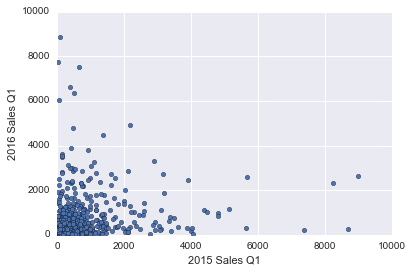

In [37]:
# Quick plot to check the computations
#plt.figure(figsize = (10,10))
sales.plot(kind='scatter', x="2015 Sales Q1", y="2016 Sales Q1");

plt.xlim(0, 10000)
plt.ylim(0, 10000)

In [38]:
# Q1 sales, may want to also use aggregate as above to have more columns (means, etc.)

# Sales 2015  Q2-Q4
start_date1 = pd.Timestamp("20150401")
end_date1 = pd.Timestamp("20151231")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask1 = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample4 = new_sample[mask1].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2015 Remaining Sales"] = new_sample4["Sale (Dollars)"]

# Sales 2016 Q2-Q4
start_date1 = pd.Timestamp("20160401")
end_date1 = pd.Timestamp("20161231")
new_sample.sort_values(by=["Store Number", "Date"], inplace=True)
mask1 = (new_sample['Date'] >= start_date) & (new_sample['Date'] <= end_date)
new_sample4 = new_sample[mask1].groupby(by=["Store Number"], as_index=False)["Sale (Dollars)"].sum()
sales["2016 Remaining Sales"] = new_sample4["Sale (Dollars)"]

sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,Price per Liter mean,Zip Code,County,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,2015 Remaining Sales,2016 Remaining Sales
0,2106,CEDAR FALLS,14949.85,257.756034,17.165402,50613,Black Hawk,1113.25,19.193966,85.977069,3153.39,2726.16,2726.16,2726.16
1,2113,GOWRIE,1110.40,61.688889,18.684405,50543,Webster,70.37,3.909444,20.572222,214.27,297.64,297.64,297.64
2,2130,WATERLOO,5144.60,160.768750,16.291373,50703,Black Hawk,355.92,11.122500,53.630937,1094.28,3272.88,3272.88,3272.88
3,2152,ROCKWELL,526.10,52.610000,11.258619,50469,Cerro Gordo,57.00,5.700000,17.700000,126.24,89.00,89.00,89.00
4,2178,WAUKON,2265.01,87.115769,16.107729,52172,Allamakee,152.10,5.850000,29.055000,732.40,228.47,228.47,228.47


(0, 2000)

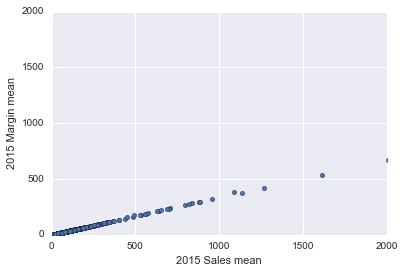

In [39]:
# Quick plot to check the computations
sales.plot(kind='scatter', x="2015 Sales mean", y="2015 Margin mean");
plt.xlim(0, 2000)
plt.ylim(0, 2000)

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

### Determine correlations / causations in the data

In [40]:
new_sample.corr()

,Store Number,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
Store Number,1.000000,-0.019517,-0.009650,-0.059119,-0.073555,-0.073688,0.021939,-0.009378,-0.013493,-0.013483,-0.009359,-0.020448
Category,-0.019517,1.000000,0.080767,-0.011580,-0.011439,-0.011682,0.000614,0.007531,-0.004408,-0.004397,0.007216,-0.017977
Vendor Number,-0.009650,0.080767,1.000000,0.029497,0.005410,0.004990,-0.000164,-0.009055,-0.001761,-0.001759,-0.009548,0.009729
Bottle Volume (ml),-0.059119,-0.011580,0.029497,1.000000,0.292579,0.293479,-0.005911,0.095178,0.164847,0.164674,0.095642,-0.288595
State Bottle Cost,-0.073555,-0.011439,0.005410,0.292579,1.000000,0.999972,-0.067945,0.144339,0.006993,0.006965,0.143643,0.766287
State Bottle Retail,-0.073688,-0.011682,0.004990,0.293479,0.999972,1.000000,-0.067896,0.144424,0.007271,0.007242,0.143759,0.765889
Bottles Sold,0.021939,0.000614,-0.000164,-0.005911,-0.067945,-0.067896,1.000000,0.833655,0.908451,0.908486,0.834737,-0.072899
Sale (Dollars),-0.009378,0.007531,-0.009055,0.095178,0.144339,0.144424,0.833655,1.000000,0.853033,0.853046,0.999897,0.065854
Volume Sold (Liters),-0.013493,-0.004408,-0.001761,0.164847,0.006993,0.007271,0.908451,0.853033,1.000000,1.000000,0.855529,-0.087541
Volume Sold (Gallons),-0.013483,-0.004397,-0.001759,0.164674,0.006965,0.007242,0.908486,0.853046,1.000000,1.000000,0.855542,-0.087483


### Validate findings using statistical analysis (p-values, confidence intervals) as applicable (possibly use statsmodels, scipy, numpy, scikit learn)

In [41]:
new_sample.describe()

,Store Number,Category,Vendor Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
count,26926.000000,2.692600e+04,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000
mean,3588.951868,1.044222e+06,256.356496,923.255515,9.813426,14.735176,9.858018,128.668476,9.037904,2.387804,42.997141,18.168509
std,950.829599,5.310050e+04,140.321963,494.325290,7.490208,11.234501,21.751932,354.975292,28.395513,7.501268,118.811734,14.296677
min,2106.000000,1.011100e+06,10.000000,50.000000,0.890000,1.340000,1.000000,1.700000,0.100000,0.030000,0.570000,2.760000
25%,2603.000000,1.012200e+06,115.000000,750.000000,5.500000,8.250000,2.000000,30.750000,1.500000,0.400000,10.260000,9.680000
50%,3721.000000,1.031200e+06,260.000000,750.000000,8.000000,12.110000,6.000000,70.560000,5.250000,1.390000,23.520000,14.860000
75%,4382.000000,1.062310e+06,380.000000,1000.000000,11.960000,17.940000,12.000000,135.000000,10.500000,2.770000,45.120000,22.800000
max,9013.000000,1.701100e+06,978.000000,3000.000000,349.990000,524.990000,768.000000,16200.000000,1050.000000,277.380000,5400.000000,699.986667


In [42]:
# tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
#pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
#print 't-statistic = %6.3f pvalue = %6.4f' % (tt, pval)
#t-statistic =  0.391 pvalue = 0.6955 

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [43]:
# load numpy and pandas for data manipulation
# Link: https://www.datarobot.com/blog/ordinary-least-squares-in-python/
# b = (X'X)^-1(X'Y) Note: OLS Regression; see theta function below

import pandas as pd
import numpy as np
from scipy import linalg

# load statsmodels as alias ``sm``
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

In [44]:
sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,Price per Liter mean,Zip Code,County,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,2015 Remaining Sales,2016 Remaining Sales
0,2106,CEDAR FALLS,14949.85,257.756034,17.165402,50613,Black Hawk,1113.25,19.193966,85.977069,3153.39,2726.16,2726.16,2726.16
1,2113,GOWRIE,1110.40,61.688889,18.684405,50543,Webster,70.37,3.909444,20.572222,214.27,297.64,297.64,297.64
2,2130,WATERLOO,5144.60,160.768750,16.291373,50703,Black Hawk,355.92,11.122500,53.630937,1094.28,3272.88,3272.88,3272.88
3,2152,ROCKWELL,526.10,52.610000,11.258619,50469,Cerro Gordo,57.00,5.700000,17.700000,126.24,89.00,89.00,89.00
4,2178,WAUKON,2265.01,87.115769,16.107729,52172,Allamakee,152.10,5.850000,29.055000,732.40,228.47,228.47,228.47


In [45]:
y = sales['2015 Volume Sold (Liters) mean']

In [46]:
X = sales['2015 Margin mean']

In [47]:
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,2015 Margin mean
0,1.0,85.977069
1,1.0,20.572222
2,1.0,53.630937
3,1.0,17.700000
4,1.0,29.055000


### Complete linear regressions using scikit-learn or statsmodels and interpret your findings

In [48]:
theta = linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # X.T: Transpose of the matrix (i.e. 3x2 Matrix
# becomes 2x3 Matrix)
# For the Matrix to be inverted it has to be squared (i.e. 3x2 multiplied by 2x3 is a 3x3 or a
# square matrix)
theta

array([ 0.08730328,  0.21468605])

In [49]:
est = sm.OLS(y, X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     2015 Volume Sold (Liters) mean   R-squared:                       0.726
Model:                                        OLS   Adj. R-squared:                  0.726
Method:                             Least Squares   F-statistic:                     3433.
Date:                            Sat, 10 Sep 2016   Prob (F-statistic):               0.00
Time:                                    19:00:28   Log-Likelihood:                -4179.2
No. Observations:                            1298   AIC:                             8362.
Df Residuals:                                1296   BIC:                             8373.
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                0.0873      0.225      0.387      0.698        -0.355     0.529
2015 Margin mean     0.2147      0.004     58.596      0.000         0.207     0.222
==============================================================================
Omnibus:                     1738.271   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1683202.351
Skew:                           6.597   Prob(JB):                         0.00
Kurtosis:                     178.921   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
est.predict(X)

array([ 18.5453805 ,   4.50387239,  11.60111735, ...,  81.35026646,
        28.94110824,  49.35775147])

In [51]:
est.params

const               0.087303
2015 Margin mean    0.214686
dtype: float64

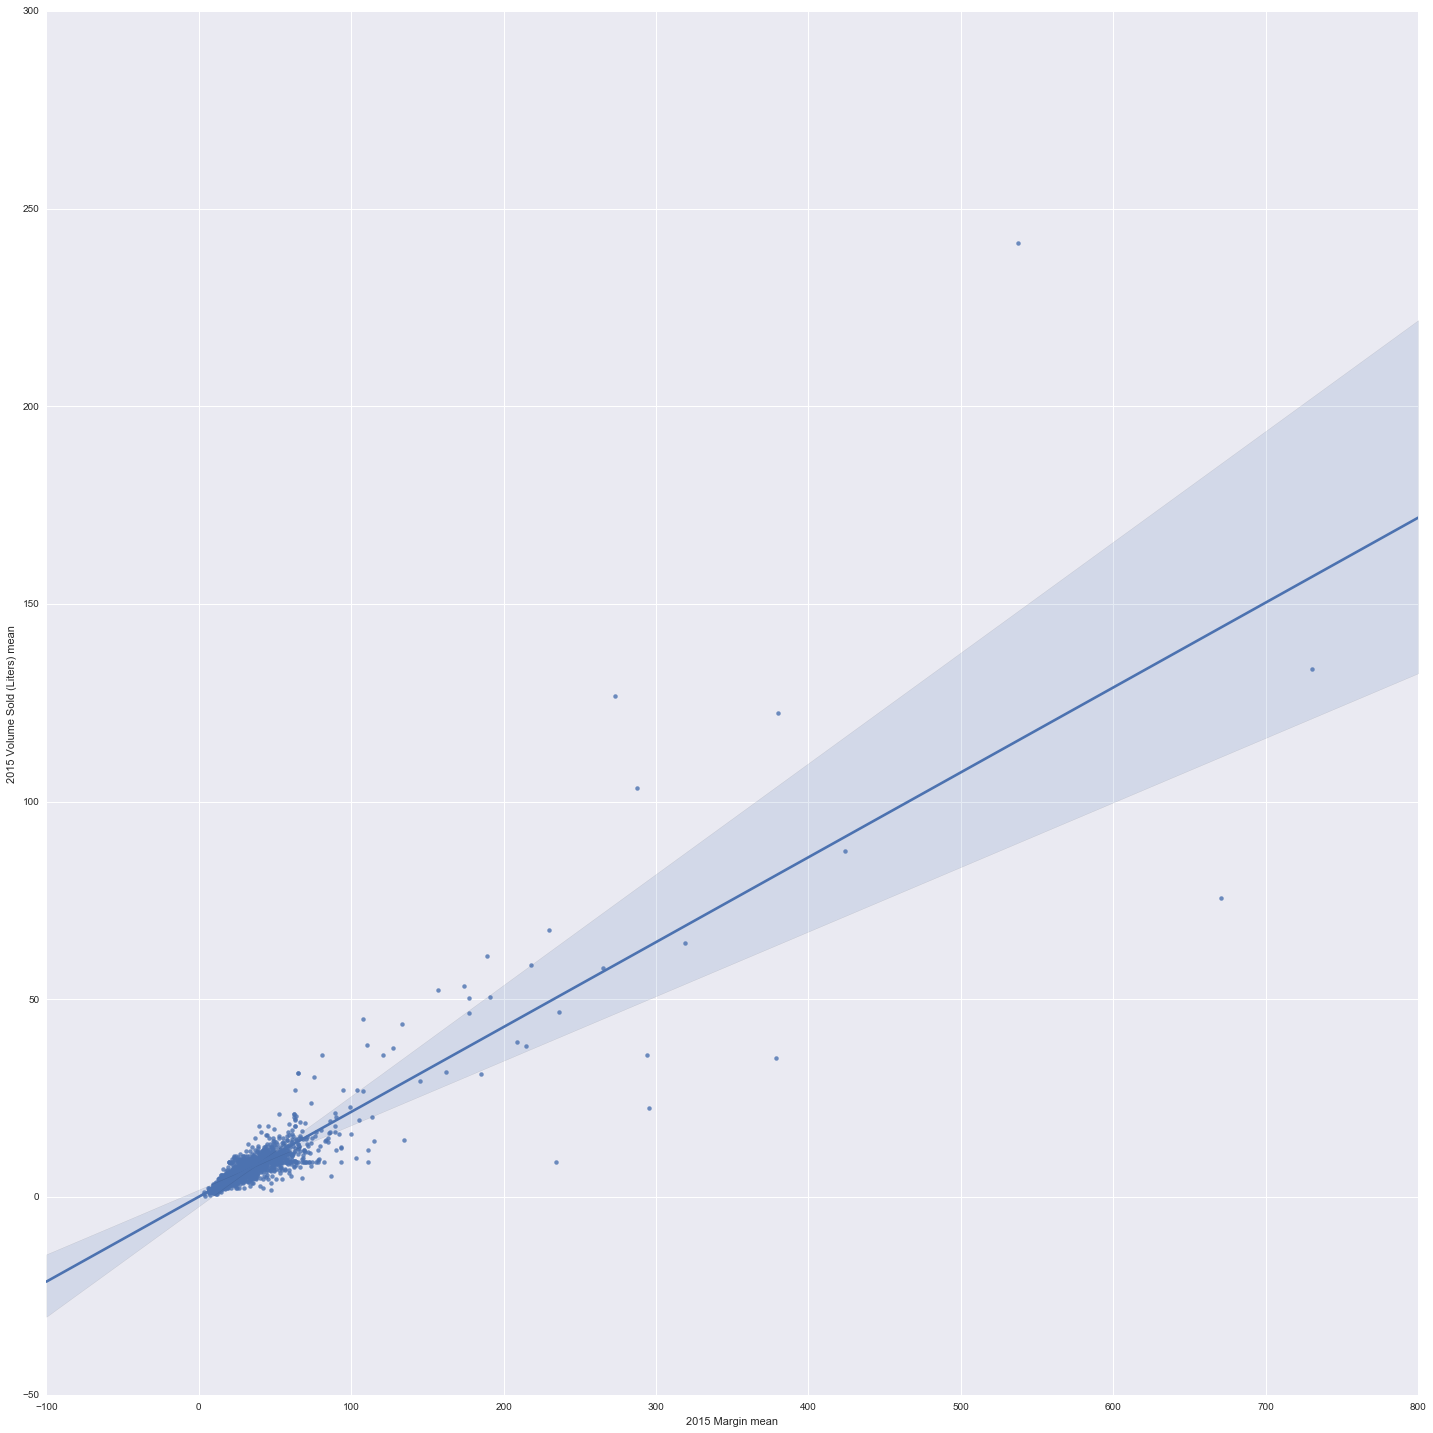

In [52]:
sns.lmplot(x='2015 Margin mean', y='2015 Volume Sold (Liters) mean', data=sales, size = 20)

### Calculate and plot predicted probabilities and/or present tables of results

In [53]:
xs = sales['2015 Margin mean']
ys = [x*x + 1 for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

[7393.0563879013089, 424.21632716049373, 2877.2774571289056, 314.28999999999996, 845.19302500000003, 621.0134109635959, 2276.1564419599986, 247.29609697231828, 1248.5331132325141, 679.9672489999997, 1746.1844967859743, 13288.172899999996, 1838.7552437641725, 5166.0009689446379, 753.96950733039284, 517.10103316326536, 1784.8680447086806, 1650.7522938775512, 2434.7717979834711, 154.71350351562501, 147.54376738227148, 1156.3200999999997, 753.9193003906247, 341.69981489197534, 259.88810000000001, 6397.800400000001, 244.00355918367342, 233.46084444444438, 1533.3179766944443, 1896.5666793445823, 8058.4245152354561, 953.44405209467436, 2051.6324225537182, 920.51086181640608, 7320.3728444444459, 993.60541643655495, 7991.1410051053763, 829.06952432057199, 327.60098864265927, 2081.5715352019124, 978.43769599999951, 557.2660986159168, 1003.0349139652561, 7433.766213781817, 5739.8728774472684, 3206.518353250548, 1472.5553607346944, 3309.8273539437587, 500.96960000000013, 1780.7851562499993, 2934.1

### Describe the bias-variance tradeoff of your model and errors metrics

In [54]:
sales.columns

Index([                  u'Store Number',                           u'City',
                           u'2015 Sales',                u'2015 Sales mean',
                 u'Price per Liter mean',                       u'Zip Code',
                               u'County',      u'2015 Volume Sold (Liters)',
       u'2015 Volume Sold (Liters) mean',               u'2015 Margin mean',
                        u'2015 Sales Q1',                  u'2016 Sales Q1',
                 u'2015 Remaining Sales',           u'2016 Remaining Sales'],
      dtype='object')

In [55]:
sales.dtypes

Store Number                        int64
City                               object
2015 Sales                        float64
2015 Sales mean                   float64
Price per Liter mean              float64
Zip Code                           object
County                             object
2015 Volume Sold (Liters)         float64
2015 Volume Sold (Liters) mean    float64
2015 Margin mean                  float64
2015 Sales Q1                     float64
2016 Sales Q1                     float64
2015 Remaining Sales              float64
2016 Remaining Sales              float64
dtype: object

In [56]:
sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,Price per Liter mean,Zip Code,County,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,2015 Remaining Sales,2016 Remaining Sales
0,2106,CEDAR FALLS,14949.85,257.756034,17.165402,50613,Black Hawk,1113.25,19.193966,85.977069,3153.39,2726.16,2726.16,2726.16
1,2113,GOWRIE,1110.40,61.688889,18.684405,50543,Webster,70.37,3.909444,20.572222,214.27,297.64,297.64,297.64
2,2130,WATERLOO,5144.60,160.768750,16.291373,50703,Black Hawk,355.92,11.122500,53.630937,1094.28,3272.88,3272.88,3272.88
3,2152,ROCKWELL,526.10,52.610000,11.258619,50469,Cerro Gordo,57.00,5.700000,17.700000,126.24,89.00,89.00,89.00
4,2178,WAUKON,2265.01,87.115769,16.107729,52172,Allamakee,152.10,5.850000,29.055000,732.40,228.47,228.47,228.47


In [57]:
sales_drop = sales.dropna()

In [58]:
modeler = sales_drop.groupby('Store Number').sum()
modeler.head()

,2015 Sales,2015 Sales mean,Price per Liter mean,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,2015 Remaining Sales,2016 Remaining Sales
Store Number,,,,,,,,,,
2106,14949.85,257.756034,17.165402,1113.25,19.193966,85.977069,3153.39,2726.16,2726.16,2726.16
2113,1110.40,61.688889,18.684405,70.37,3.909444,20.572222,214.27,297.64,297.64,297.64
2130,5144.60,160.768750,16.291373,355.92,11.122500,53.630937,1094.28,3272.88,3272.88,3272.88
2152,526.10,52.610000,11.258619,57.00,5.700000,17.700000,126.24,89.00,89.00,89.00
2178,2265.01,87.115769,16.107729,152.10,5.850000,29.055000,732.40,228.47,228.47,228.47


In [59]:
from sklearn import datasets, linear_model

lm = linear_model.LinearRegression()

for i, label1 in enumerate(modeler.columns):

        X = modeler[[label1]]
        y = modeler['2015 Sales']

        model = lm.fit(X, y)
        predictions = lm.predict(X)

        print label1, '2015 Sales', model.score(X,y)

2015 Sales 2015 Sales 1.0
2015 Sales mean 2015 Sales 0.163929824739
Price per Liter mean 2015 Sales 0.0151064328516
2015 Volume Sold (Liters) 2015 Sales 0.963767259694
2015 Volume Sold (Liters) mean 2015 Sales 0.0910861851325
2015 Margin mean 2015 Sales 0.162930885556
2015 Sales Q1 2015 Sales 0.0444598889634
2016 Sales Q1 2015 Sales 0.0149340374517
2015 Remaining Sales 2015 Sales 0.0149340374517
2016 Remaining Sales 2015 Sales 0.0149340374517


In [60]:
yhat = lm.predict(X)
sse = np.mean((np.mean(yhat) - y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
print 'Sum of Squared Errors (SSE):',sse
print 'Variance:',var
print 'Bias:',bias

Sum of Squared Errors (SSE): 26030027.7971
Variance: 388733.409992
Bias: 25641294.3771


In [61]:
xs = sales['2015 Sales']
ys = [x*x + 1 for x in xs] # true values
predictions = [2*x for x in xs]
print ys
print predictions

sns.scatter()

[223498016.02250013, 1232989.1600000001, 26466910.159999993, 276782.21000000002, 5130271.3001000006, 118635011.48089994, 50939624.839999974, 2554979.4649, 5918030.2899999991, 2432633.8961, 21483504.100900006, 7648267.8025000012, 29164861.202499997, 53474266.012099996, 31963872.395600017, 909449.32249999978, 13494750.190400001, 727302.95240000007, 65921572.024099983, 353907.00999999995, 1902883.3024999995, 1031830.3241, 6921214.8724000007, 3929831.4644000004, 37188.265599999999, 2070837.1216, 3843600.4600999998, 75274.40959999997, 197919879.56000015, 296049878.21000022, 417944461.81609982, 36009601.640000015, 221859834.40159976, 8449022.1583999991, 370375029.71689987, 13334402.656899998, 1427071508.5599999, 37124406.28040003, 1060118.3443999998, 320847626.3283999, 71014667.080400065, 12988889.080099998, 53254382.953600004, 264937149.07209986, 95314412.668099955, 157556721.6656, 16147700.296400001, 86645380.722499967, 9908456.9729000032, 36611213.518400013, 65941059.568100043, 46063912.9

AttributeError: 'module' object has no attribute 'scatter'

### Evaluate model fit by using loss functions, including mean absolute error, mean squared error, and root mean squared error, or r-squared

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print "RMSE:", mean_squared_error(ys, predictions)
print "MAE:", mean_absolute_error(ys, predictions)

RMSE: 1.66792381694e+17
MAE: 33609728.0732


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

For this dataset my task was to recommend to a particular investor some locations in Iowa that would be ideal for opening up a liquor store. I used various cleaning methods and visualizations in order to understand the data and make it usable. For cleaning, I converted the "Date" column to datetime, removed any $ signs with the regex function, and changed numerical columns from object to float data types. For visualizations, I used matplotlib to plot scatter plots of numerical columns vs. Sale (Dollars). I also plotted county, city, and zip code by Sale (Dollars) to understand what areas had the best sales. I created a linear regression of the Margin vs Sale (Dollars) and as expected it had a positive correlation. I also plotted the Margin vs. Bottles Sold and found it had a positive correlation as well. I struggled somewhat with the regression modeling and unsure of the results.